In [2]:
!pip install openai

In [4]:
 !pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a1/f6/57de91ea40c670527cd47a6548bf2cbedc68cec57c041793b256356abad7/opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 4.0 MB/s eta 0:00:0000:0100:01


In [6]:
import openai


In [8]:
from IPython.display import display, Image, Audio
import cv2
import base64
import time
import openai  # Corrected import statement
import os
import requests

# Initialize OpenAI client with your API key
openai.api_key = "sk-"  # Replace with your actual OpenAI API key


In [9]:
!pip install pytube


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 345.6 kB/s eta 0:00:00a 0:00:01


In [10]:
from pytube import YouTube
import cv2
import base64
import tempfile
import os

# Replace 'YOUR_YOUTUBE_URL' with your YouTube video URL
youtube_url = 'https://youtu.be/x5wkIewzyNg?si=Si8ZARsm2IExr56I'

# Function to download YouTube video
def download_youtube_video(url):
    yt = YouTube(url)
    video_stream = yt.streams.filter(file_extension='mp4').first()
    temp_directory = tempfile.mkdtemp()
    video_path = video_stream.download(output_path=temp_directory)
    return video_path

# Download the YouTube video
video_path = download_youtube_video(youtube_url)

# Now, use OpenCV to process the video frames
base64Frames = []
video = cv2.VideoCapture(video_path)
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()

# Optionally, delete the downloaded video file
os.remove(video_path)

print(len(base64Frames), "frames read.")


765 frames read.


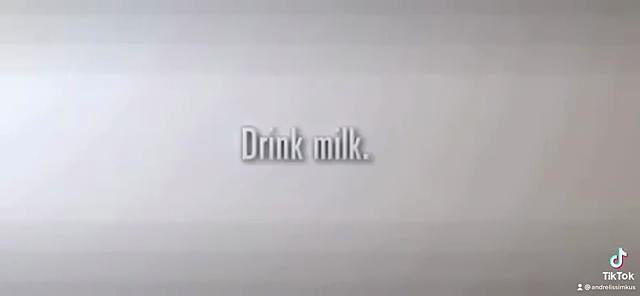

In [40]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)


In [14]:
import openai

# Initialize the OpenAI client with your API key
openai.api_key = 'sk-'  # Replace with your actual API key
client = openai.ChatCompletion()

# Assuming 'base64Frames' is already defined and contains your video frames in base64 format
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::100]),  # Adjusted to take every 100th frame
        ],
    },
]

params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,  # You can adjust this if needed
}

# Sending the request to OpenAI and printing the result
result = client.create(**params)
print(result.choices[0].message.content)


"🌋 When the heat is just too much to handle, watch how this clever creature cools down in the most epic way! Dive into a world where volcanoes erupt and ice is a prized possession, with our adventurous pal on a quest for the ultimate chill. 🧊🥤 Laugh, gasp, and share the freezing fun – because everyone deserves a cool break in a lava-hot world! #ChillQuest #VolcanicVibes #IcyEscapade ❄️🔥"

Feel free to adapt this description to fit the platform you're using and any specific tone or style you want for your video.


In [19]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video. Create a short voiceover script in the style of Shah Rukh Khan. Only include the narration.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::1000]),
        ],
    },
]

params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

# Corrected method to create completions
result = client.create(**params)
print(result.choices[0].message.content)


In the gentle, yet resolute tone of Shah Rukh Khan:

"Sometimes life throws at us challenges as daunting as the molten fury of a volcano. It's then that we must look within and find the courage to face our fears. With determination in our hearts and the spirit to never give up, we can conquer the impossible. And sometimes, all it takes is the belief that we can... over a simple glass of our favorite drink. To overcoming obstacles, cheers!"


In [23]:
!pip install requests


In [31]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": "Bearer sk-"  # Your actual API key
    },
    json={
        "model": "tts-1-1106",
        "input": text_to_convert,
        "voice": "onyx",
    },
)


In [42]:
import requests
from IPython.display import Audio

# Corrected Authorization header with the API key
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": "Bearer sk-"  # Your actual API key
    },
    json={
        "model": "tts-1-1106",
        "input": "Sometimes life throws at us challenges as daunting as the molten fury of a volcano. Its then that we must look within and find the courage to face our fears. With determination in our hearts and the spirit to never give up, we can conquer the impossible. And sometimes, all it takes is the belief that we can... over a simple glass of our favorite drink. To overcoming obstacles, cheers",  # Make sure this variable contains the text you want to convert
        "voice": "onyx",
    },
)

# Check if the request was successful
if response.status_code == 200:
    audio = b""
    for chunk in response.iter_content(chunk_size=1024 * 1024):
        audio += chunk

    # To play audio in Jupyter Notebook
    display(Audio(audio))

    # Optionally, save the audio to a file
    with open("output_audio.mp3", "wb") as file:
        file.write(audio)
else:
    print("Error in text-to-speech request:", response.status_code, response.text)
